In [53]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [54]:
df_aapl = pandas_datareader.data.DataReader('AAPL', 'yahoo', '2020-01-01')
df_fb = pandas_datareader.data.DataReader('FB', 'yahoo', '2020-01-01')
df_gold = pandas_datareader.data.DataReader('GLD', 'yahoo', '2020-01-01')

df_fb.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-15,181.440002,178.199997,178.960007,180.889999,15878700,180.889999
2022-08-16,180.990005,177.039993,179.440002,179.470001,21156700,179.470001
2022-08-17,178.139999,174.169998,176.759995,174.850006,20118100,174.850006
2022-08-18,175.759995,171.860001,174.339996,174.660004,18844500,174.660004
2022-08-19,172.320007,167.050003,170.199997,167.960007,26158300,167.960007


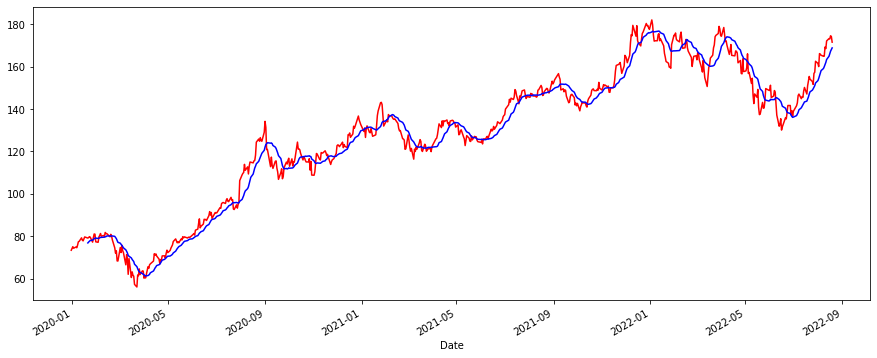

In [55]:
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['Close'].plot(figsize=(15, 6), color='red')
df_aapl['SMA'].plot(figsize=(15, 6), color='blue')
plt.show()

In [56]:
df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open'])) / (df_aapl['Open']) * 100)
df_fb['change'] = (((df_fb['Close'] - df_fb['Open'])) / (df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open'])) / (df_gold['Open']) * 100)
df_aapl.tail(2).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,change
Date,,,,,,,,
2022-08-18,174.90,173.12,173.75,174.15,62290100.0,174.15,168.10,0.23
2022-08-19,173.74,171.31,173.03,171.52,70211500.0,171.52,168.81,-0.87


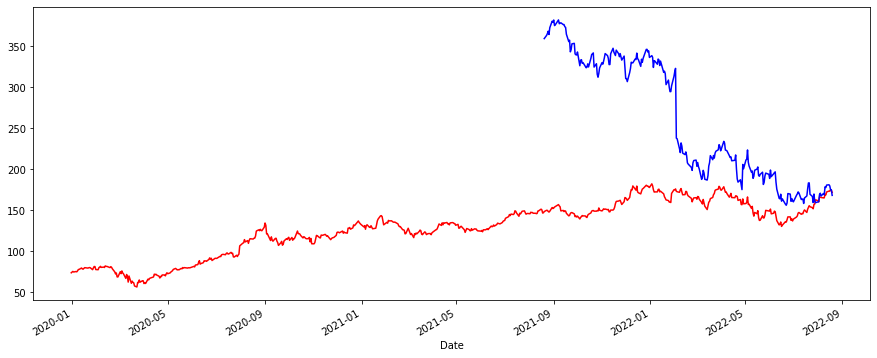

In [57]:
df_aapl['Close'].plot(figsize=(15, 6), color='red')
df_fb['Close'].plot(figsize=(15, 6), color='blue')
plt.show()

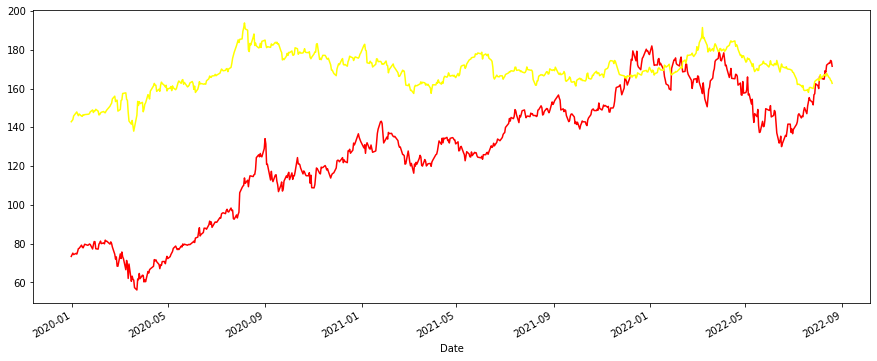

In [58]:
df_aapl['Close'].plot(figsize=(15, 6), color='red')
df_gold['Close'].plot(figsize=(15, 6), color='yellow')
plt.show()

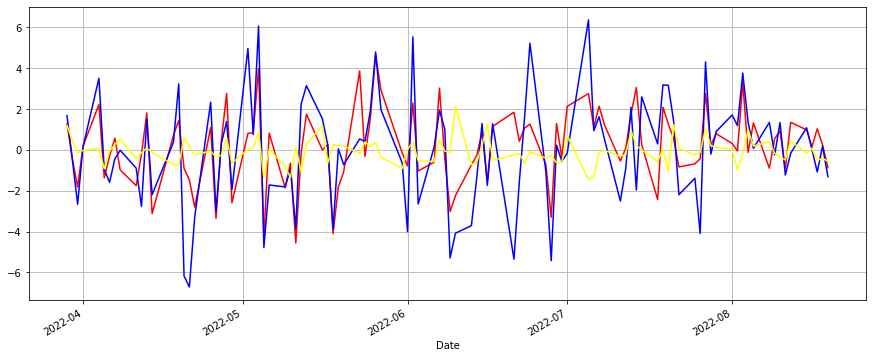

In [59]:
df_aapl['change'].tail(100).plot(grid=True, figsize=(15, 6), color='red')
df_fb['change'].tail(100).plot(grid=True, figsize=(15, 6), color='blue')
df_gold['change'].tail(100).plot(grid=True, figsize=(15, 6), color='yellow')
plt.show()

In [60]:
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2022-06-24,141.910004,139.770004,139.899994,141.660004,89116800.0,141.463501,138.244287,1.258048,164.869995
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.463501,137.924287,-0.728797,164.919998
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.249359,137.119287,-3.299798,169.240005
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242400.0,139.036865,136.495714,1.287639,168.490005
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.530350,136.072857,-0.386156,172.100006
2022-07-01,139.039993,135.660004,136.039993,138.929993,71051600.0,138.737274,136.201428,2.124375,173.190002
2022-07-05,141.610001,136.929993,137.770004,141.559998,73353800.0,141.363632,136.892856,2.750957,173.029999
2022-07-06,144.119995,141.080002,141.350006,142.919998,74064300.0,142.721756,137.618571,1.110712,174.550003
2022-07-07,146.550003,143.279999,143.289993,146.350006,66253700.0,146.147003,138.398572,2.135538,174.149994


In [61]:
X = np.array(df_aapl.drop(['label', 'SMA'], axis=1))
X = sklearn.preprocessing.scale(X)

predict_data = X[-30:]
X = X[:-30]
y = np.array(df_aapl['label'])
y = y[:-30]

In [62]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
accuracy

0.8203401567888493

In [63]:
predict_data = model.predict(predict_data)
predict_data

array([154.12140937, 157.08837161, 156.12857009, 158.50599125,
       156.7345567 , 154.56719953, 158.72224425, 161.39100498,
       159.76853754, 160.72308157, 160.91568097, 159.52055933,
       165.17017397, 160.05402453, 165.49058952, 169.13253109,
       168.15041722, 173.03292831, 169.83942872, 173.73839066,
       171.93726206, 172.10350824, 174.25255947, 174.3311495 ,
       177.43963048, 178.96651945, 177.27434231, 180.75775193,
       178.50636801, 175.59604816])

In [64]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predict_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns) - 1), data)

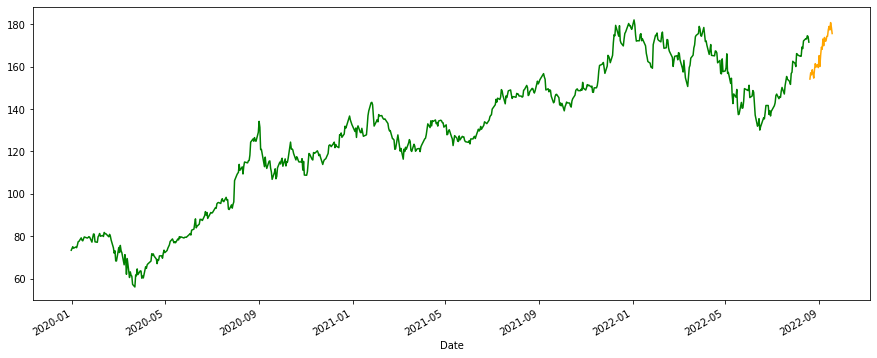

In [65]:
df_aapl['Close'].plot(figsize=(15, 6), color='green')
df_aapl['Predict'].plot(figsize=(15, 6), color='orange')

plt.show()

In [67]:
import streamlit as st
import numpy as np
import pandas as pd
import datetime as datetime
import pandas_datareader
import datetime
import plotly.graph_objects as go
import sklearn
import sklearn.linear_model
import sklearn.model_selection
from PIL import Image
import yfinance as yf

st.title('AIで株価予測アプリ')
st.write('AIを使って、株価を予測してみましょう。')

image = Image.open('stock_predict.png')
st.image(image, use_column_width=True)

st.write('※あくまでAIによる予測です（参考値）。こちらのアプリによる損害や損失は一切保証しかねます。')

st.header('株価銘柄のティッカーシンボルを入力してください。')
stock_name = st.text_input('例：AAPL, FB, SFTBY（大文字、小文字どちらでも可）', 'AAPL')

# stock_name = stock_name.upper()

# stock_name_full = yf.Ticker(str(stock_name))
# stock_name_full = stock_name_full.info['longName']

